In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import os
import seaborn as sns

from matplotlib.colors import LogNorm

### Number of events recorded per year

In [2]:
storm_data = pd.read_csv("../Data/Prod_datasets/Storm_events_details_full_clean.csv")

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9008\1569508335.py:1: DtypeWarning: Columns (10,20,22,23,28,29,31,33,34,36,37,42,43,48) have mixed types. Specify dtype option on import or set low_memory=False.
  storm_data = pd.read_csv("../Data/Prod_datasets/Storm_events_details_full_clean.csv")


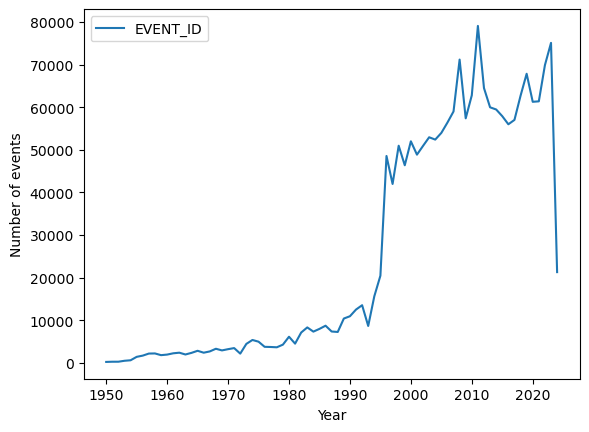

In [3]:
storm_data.groupby("YEAR").count().plot(y = "EVENT_ID")
plt.xlabel("Year")
plt.ylabel("Number of events");

### Narrowing the categories of events

In [6]:
## Creating a mapping table of the storm events

storm_events = storm_data["EVENT_TYPE"].unique()
storm_events.sort()
mapping_table_events = {"EVENT_TYPE": list(storm_events), "EVENT_CAT": ["Astronomical Low Tide", "Avalanche", "Blizzard", "Submersion", "Wind Chill", "Debris Flow", "Fog", "Fog", "Drought", "Dust Devil", "Storm", "Heat", "Wind Chill", "Flood", "Flood", "Fog", "Frost", "Funnel Cloud", "Flood", "Hail", "Hail", "Heat", "Heavy Rain", "Heavy Snow", "High Surf", "High Wind", "Hurricane", "Hurricane", "Blizzard", 'Heavy Snow', "Flood", "Lightning", "Fog", "Hail", "High Wind", "Hurricane", "Lightning", "High Wind", "Thunderstorm", "Tropical Storm", "Tropical Storm", "Northern Lights", "Rip Current", "Submersion", "Heavy Snow", "Submersion", "Submersion", "High Wind", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Tornado", "Tornado", "Thunderstorm", "Tornado", "Tropical Depression", "Tropical Storm", "Submersion", "Volcanic Ash", "Volcanic Ash", "Waterspout", "Wildfire", "Blizzard", "Winter Weather"]}
mapping_table_events = pd.DataFrame(mapping_table_events)
print(mapping_table_events.to_string())

                        EVENT_TYPE              EVENT_CAT
0            Astronomical Low Tide  Astronomical Low Tide
1                        Avalanche              Avalanche
2                         Blizzard               Blizzard
3                    Coastal Flood             Submersion
4                  Cold/Wind Chill             Wind Chill
5                      Debris Flow            Debris Flow
6                        Dense Fog                    Fog
7                      Dense Smoke                    Fog
8                          Drought                Drought
9                       Dust Devil             Dust Devil
10                      Dust Storm                  Storm
11                  Excessive Heat                   Heat
12         Extreme Cold/Wind Chill             Wind Chill
13                     Flash Flood                  Flood
14                           Flood                  Flood
15                    Freezing Fog                    Fog
16            

In [139]:
# Merging the dataset with the mapping table, already done int the pre-processing part, no need to do it again.
# storm_data = storm_data.join(mapping_table_events.set_index("EVENT_TYPE"), on  = "EVENT_TYPE")

### Analysing the occurences of the events

In [7]:
event_count = storm_data.loc[storm_data["YEAR"]>1995].groupby(["YEAR", "EVENT_CAT"]).count().reset_index()[["YEAR", "EVENT_CAT", "EVENT_ID"]].pivot(columns = "EVENT_CAT", index = "YEAR", values= "EVENT_ID")
event_count.head()

EVENT_CAT,Astronomical Low Tide,Avalanche,Blizzard,Debris Flow,Drought,Dust Devil,Flood,Fog,Frost,Hail,...,Submersion,Thunderstorm,Tornado,Tropical Depression,Tropical Storm,Volcanic Ash,Waterspout,Wildfire,Wind Chill,Winter Weather
YEAR,,,,,,,,,,,,,,,,,,,,,
1996,NaN,7.0,5181.0,24.0,772.0,11.0,5543.0,292.0,72.0,10826.0,...,221.0,10084.0,1267.0,NaN,116.0,NaN,150.0,62.0,2578.0,641.0
1997,5.0,4.0,4564.0,19.0,392.0,8.0,4973.0,307.0,159.0,8612.0,...,120.0,9868.0,1180.0,NaN,12.0,2.0,218.0,37.0,1579.0,1006.0
1998,NaN,17.0,3572.0,3.0,1774.0,4.0,5900.0,407.0,12.0,12561.0,...,186.0,13603.0,1529.0,NaN,144.0,NaN,176.0,113.0,505.0,833.0
1999,NaN,24.0,3777.0,NaN,2662.0,10.0,4096.0,624.0,35.0,10146.0,...,85.0,10347.0,1520.0,NaN,54.0,2.0,270.0,298.0,599.0,1110.0
2000,NaN,29.0,5435.0,2.0,2332.0,3.0,3892.0,488.0,233.0,11296.0,...,13.0,12408.0,1169.0,NaN,44.0,NaN,263.0,372.0,1956.0,571.0


In [8]:
## Normalisation
event_count = event_count/event_count.iloc[0,:]*100 

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21188\1973008306.py:7: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(shrink = 1, location = 'top')


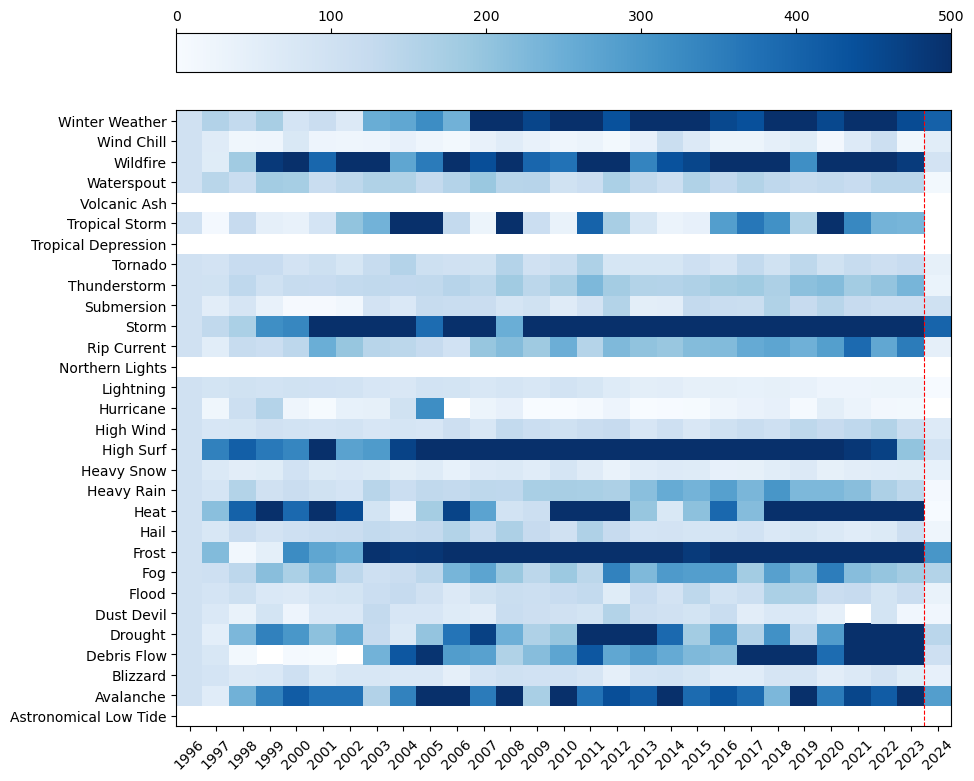

In [9]:
## Plotting the number of events

plt.figure(figsize=(10,10))
plt.pcolor(event_count.T, vmin = 0, vmax = 500, cmap = "Blues")#, norm = LogNorm(vmin = event_count.min(axis = None), vmax = event_count.max(axis = None)))
plt.xticks(ticks = 0.5+np.arange(len(event_count.index)), labels = event_count.index, rotation = 45)
plt.yticks(ticks = 0.5+np.arange(len(event_count.columns)), labels = event_count.columns)
plt.colorbar(shrink = 1, location = 'top')
plt.axvline(x = len(event_count.index)-1, c = "red", linestyle = "dashed", linewidth = 0.8);

### Analysing the cost of the events

In [7]:
## Discounting the amounts to have inflation adjusted amounts
storm_data["DISCOUNT_DAMAGE_PROPERTY"] = storm_data["INFLATION_INDEX"] * storm_data["DAMAGE_PROPERTY"]
storm_data["DISCOUNT_DAMAGE_CROPS"] = storm_data["INFLATION_INDEX"] * storm_data["DAMAGE_CROPS"]

cost = storm_data.loc[(storm_data["YEAR"]>1995 )& (storm_data["DISCOUNT_DAMAGE_PROPERTY"] != 0)].groupby(["YEAR", "EVENT_CAT"])["DISCOUNT_DAMAGE_PROPERTY"].mean().reset_index().pivot(columns = "EVENT_CAT", index = "YEAR", values = "DISCOUNT_DAMAGE_PROPERTY")
cost.replace(to_replace = [0], value = np.nan, inplace = True) 

# Normalisation
# cost = cost/cost.iloc[0, :] * 100

In [8]:
sort_index = storm_data.loc[(storm_data["DISCOUNT_DAMAGE_PROPERTY"] != 0)].groupby(["EVENT_CAT"])["DISCOUNT_DAMAGE_PROPERTY"].mean()
sort_index = dict(sorted(sort_index.items(), key=lambda item: item[1], reverse = False))
sort_index = [str(x) for x in list(sort_index.keys())]

def sorter(col, reorder = sort_index):
    mapper = {name: order for order, name in enumerate(reorder)}
    return col.map(mapper)

cost = cost.T.sort_index(key = sorter)

YEAR,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
EVENT_CAT,,,,,,,,,,,,,,,,,,,,,
Dust Devil,7971.509166,8525.542861,2326.628635,5833.904116,4200.410964,4320.521460,4655.432580,19935.043305,2358.489517,5807.943058,...,7440.212380,10352.619846,23790.127100,170406.423260,22050.296420,17324.545420,NaN,58463.180879,5149.990000,200.000000
Rip Current,NaN,NaN,NaN,2800.273976,NaN,43205.214601,70006.504960,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Winter Weather,19160.706969,13048.592058,31941.470527,26234.940898,5769.150835,7397.256439,6067.230430,11103.679715,39511.793795,16636.913811,...,43485.189598,62216.242902,42303.886417,85343.693063,140280.164464,29646.513769,65125.185991,31081.350237,136018.037774,83837.837838
Avalanche,33801.452294,NaN,58988.261345,10112.100468,151014.775116,7040.849787,11026.024531,10350.887870,40201.525856,263997.411717,...,NaN,1690.223648,16220.541205,NaN,193727.604265,NaN,342485.201479,NaN,91476.697375,27500.000000
Thunderstorm,144790.525771,56426.602164,269339.599360,74893.781914,54581.095002,89999.761177,71715.291121,94888.442076,46710.456279,110375.785415,...,52337.278959,38435.773232,57218.553641,45877.435146,44641.644217,34720.392697,48196.306223,35560.496287,70296.277034,17215.000000


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9008\1792330577.py:11: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  a = plt.colorbar(shrink = 1,).set_label(label = "Average damage cost (in $, log-scaled)",size=ftsize)


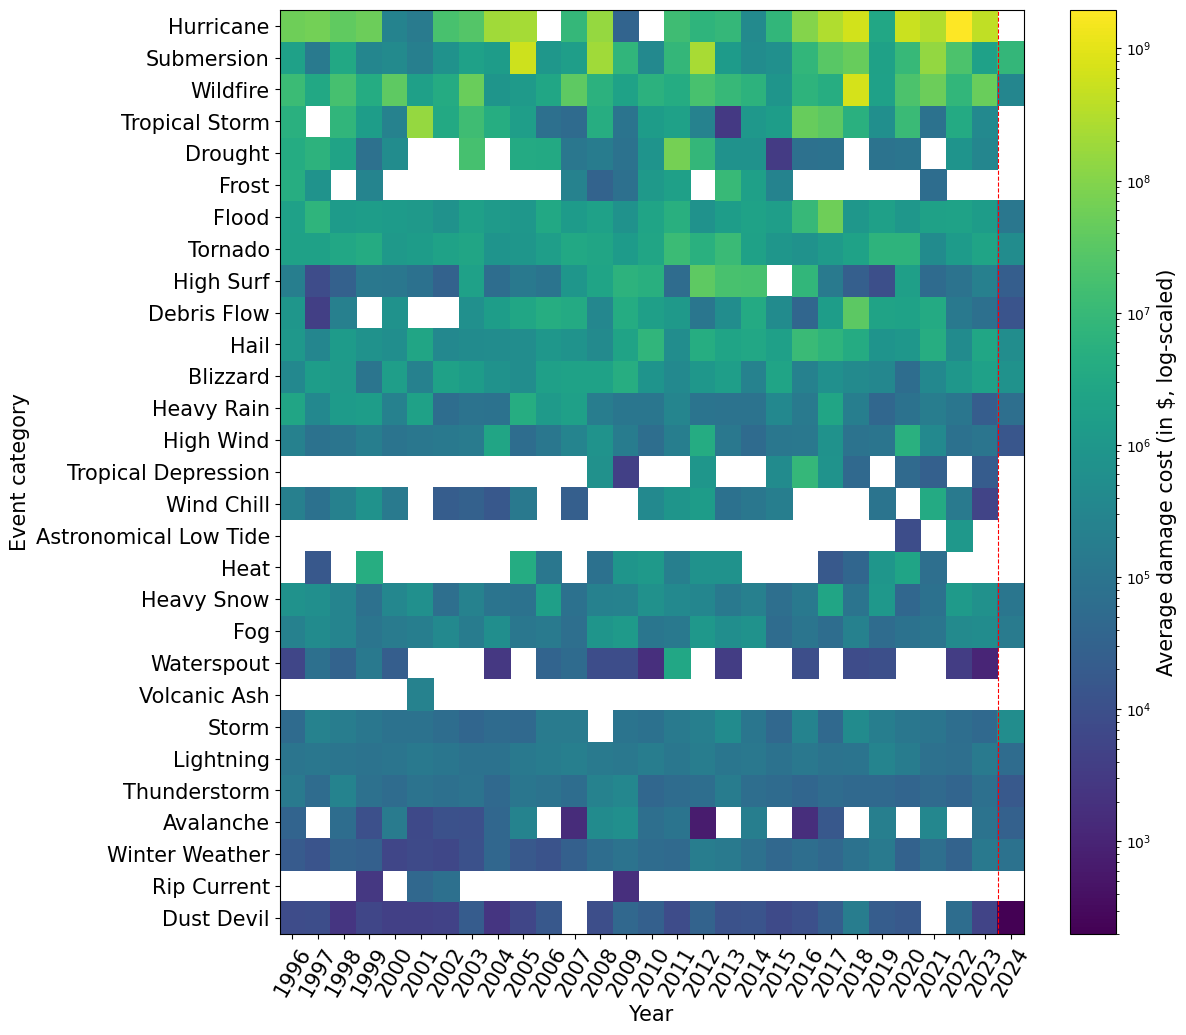

In [19]:
## Plotting the evolution of the costs with time
ftsize = 15

# plt.rcParams.update({'font.size': 10}) # changes the default fontsize of matplotlib plots
cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#041734',"#9FCAE1", '#3FAAA4'], N=256) #9FCAE1

ax = plt.figure(figsize=(12,12))
plt.pcolor(cost, norm = LogNorm(vmin = cost.min(axis = None), vmax = cost.max(axis = None)))
plt.yticks(ticks = 0.5+np.arange(len(cost.index)), labels = cost.index, fontsize = ftsize)
plt.xticks(ticks = 0.5+np.arange(len(cost.columns)), labels = cost.columns, rotation = 60, fontsize = ftsize)
a = plt.colorbar(shrink = 1,).set_label(label = "Average damage cost (in $, log-scaled)",size=ftsize)
plt.axvline(x = len(cost.columns)-1, c = "red", linestyle = "dashed", linewidth = 0.8)

plt.xlabel("Year", fontdict = {"size":ftsize})
plt.ylabel("Event category", fontdict = {"size":ftsize})
plt.savefig(r"C:\Users\Utilisateur\OneDrive - Imperial College London\Documents\Master thesis\Non-stationary hazard modelling project\Dissertation - Report\Figures\PDF\damage_by_time_event_cat.pdf", format='pdf', bbox_inches = "tight")
plt.show();



In [14]:
storm_data.loc[storm_data["EPISODE_ID"] == 174632.0].head() ## Example of Ian Hurricane on 30/09/2022

,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,...,DAMAGE_CROPS_ORIGINAL,INFLATION_INDEX,US_FIPS,lat,long,X_CART,Y_CART,DISCOUNT_DAMAGE_PROPERTY,DISCOUNT_DAMAGE_CROPS,EVENT_CAT
1771580,174632.0,1058654,FLORIDA,12.0,2022,September,Hurricane,Z,165,COASTAL LEE,...,0.00K,1.159984,12165.0,26.5608,-81.9780,0.966881,0.378597,8.119886e+09,0.0,Hurricane
1771581,174632.0,1058657,FLORIDA,12.0,2022,September,Hurricane,Z,160,COASTAL SARASOTA,...,0.00K,1.159984,12160.0,27.0267,-82.2770,0.955394,0.389310,2.319967e+09,0.0,Hurricane
1771586,174632.0,1058664,FLORIDA,12.0,2022,September,Hurricane,Z,56,HARDEE,...,0.00K,1.159984,12056.0,27.4927,-81.8099,0.959992,0.410686,1.159984e+06,0.0,Hurricane
1772249,174632.0,1058655,FLORIDA,12.0,2022,September,Hurricane,Z,162,COASTAL CHARLOTTE,...,0.00K,1.159984,12162.0,26.9689,-82.1085,0.959583,0.389800,3.479951e+09,0.0,Hurricane
1772466,174632.0,1058666,FLORIDA,12.0,2022,September,Tropical Storm,Z,50,PINELLAS,...,0.00K,1.159984,12050.0,27.9280,-82.7220,0.936106,0.412102,5.799919e+07,0.0,Tropical Storm


### Analysis of casualties

In [15]:
storm_data["INJURIES_TOTAL"] = storm_data["INJURIES_DIRECT"] + storm_data["INJURIES_INDIRECT"]
storm_data["DEATHS_TOTAL"] = storm_data["DEATHS_DIRECT"] + storm_data["DEATHS_INDIRECT"]
injuries = storm_data.loc[storm_data["YEAR"]>1995].groupby(["YEAR", "EVENT_CAT"])["INJURIES_TOTAL"].sum().reset_index().pivot(columns = "EVENT_CAT", index = "YEAR", values = "INJURIES_TOTAL")
injuries.replace(to_replace = [0], value = np.nan, inplace = True)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21188\1857900274.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(shrink = 1, location = 'top')


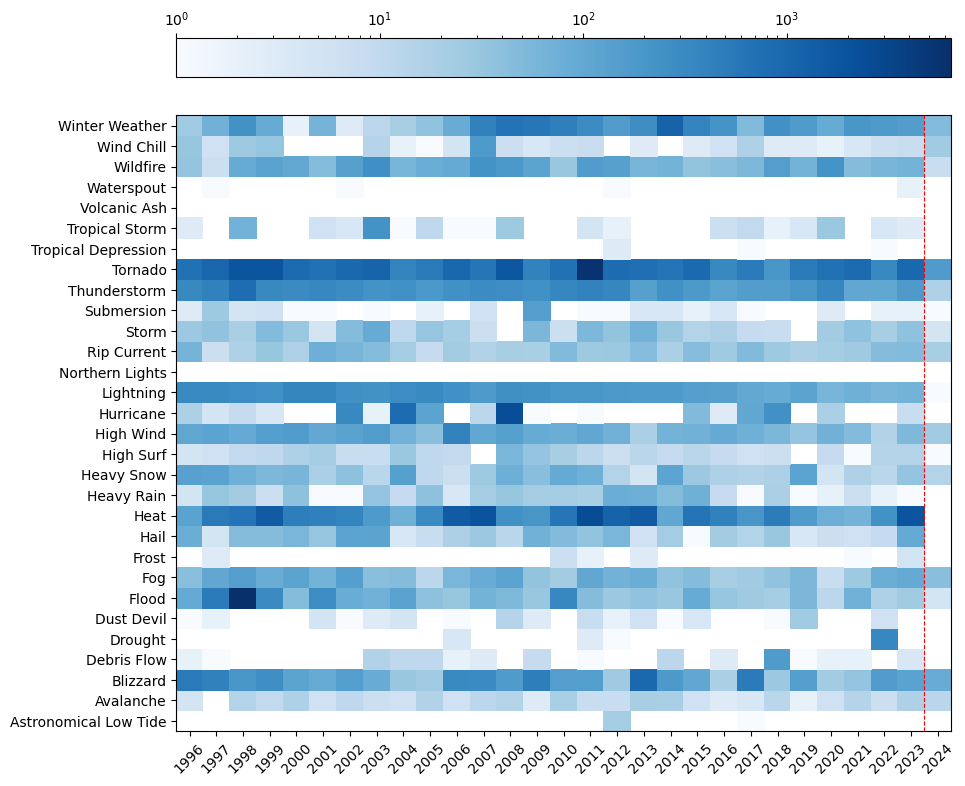

In [16]:
plt.figure(figsize=(10,10))
plt.pcolor(injuries.T, norm = LogNorm(vmin = injuries.min(axis = None), vmax = injuries.max(axis = None)), cmap = "Blues")
plt.xticks(ticks = 0.5+np.arange(len(injuries.index)), labels = injuries.index, rotation = 45)
plt.yticks(ticks = 0.5+np.arange(len(injuries.columns)), labels = injuries.columns)
plt.colorbar(shrink = 1, location = 'top')
plt.axvline(x = len(injuries.index)-1, c = "red", linestyle = "dashed", linewidth = 0.8);

### Analysis of fatalities

In [17]:
deaths = storm_data.loc[storm_data["YEAR"]>1995].groupby(["YEAR", "EVENT_CAT"])["DEATHS_TOTAL"].sum().reset_index().pivot(columns = "EVENT_CAT", index = "YEAR", values = "DEATHS_TOTAL")
deaths.replace(to_replace = [0], value = np.nan, inplace = True)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21188\4283053850.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(shrink = 1, location = 'top')


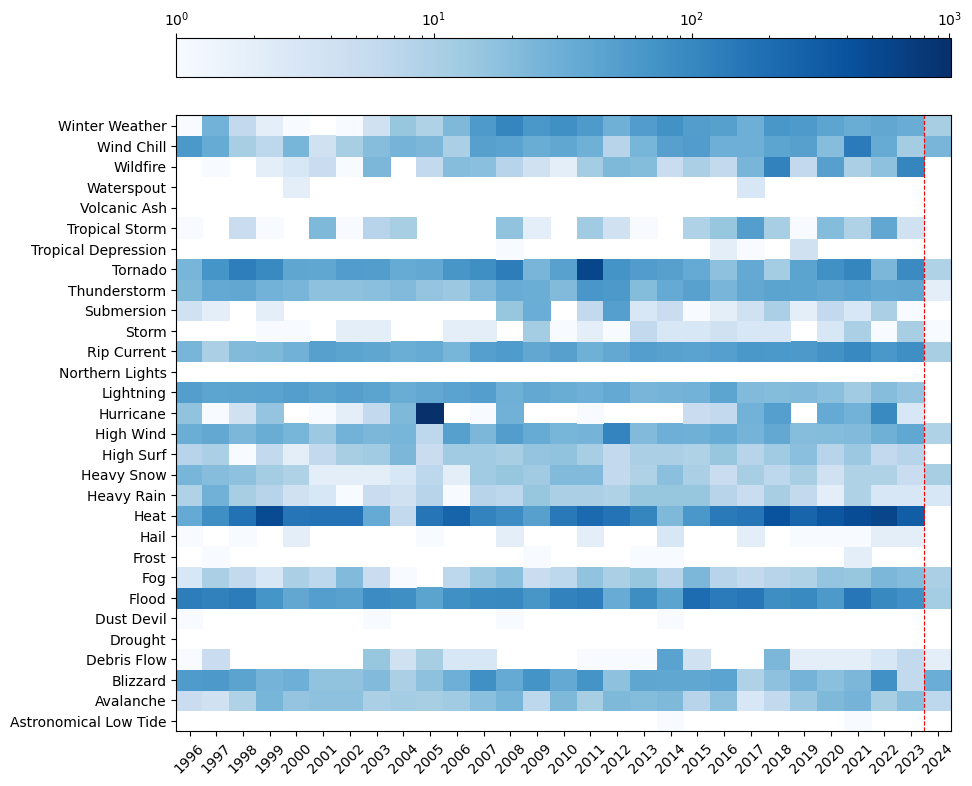

In [18]:
plt.figure(figsize=(10,10))
plt.pcolor(deaths.T, norm = LogNorm(vmin = deaths.min(axis = None), vmax = deaths.max(axis = None)), cmap = "Blues")
plt.xticks(ticks = 0.5+np.arange(len(deaths.index)), labels = deaths.index, rotation = 45)
plt.yticks(ticks = 0.5+np.arange(len(deaths.columns)), labels = deaths.columns)
plt.colorbar(shrink = 1, location = 'top')
plt.axvline(x = len(deaths.index)-1, c = "red", linestyle = "dashed", linewidth = 0.8);

### Cost per type of event (damage to properties)

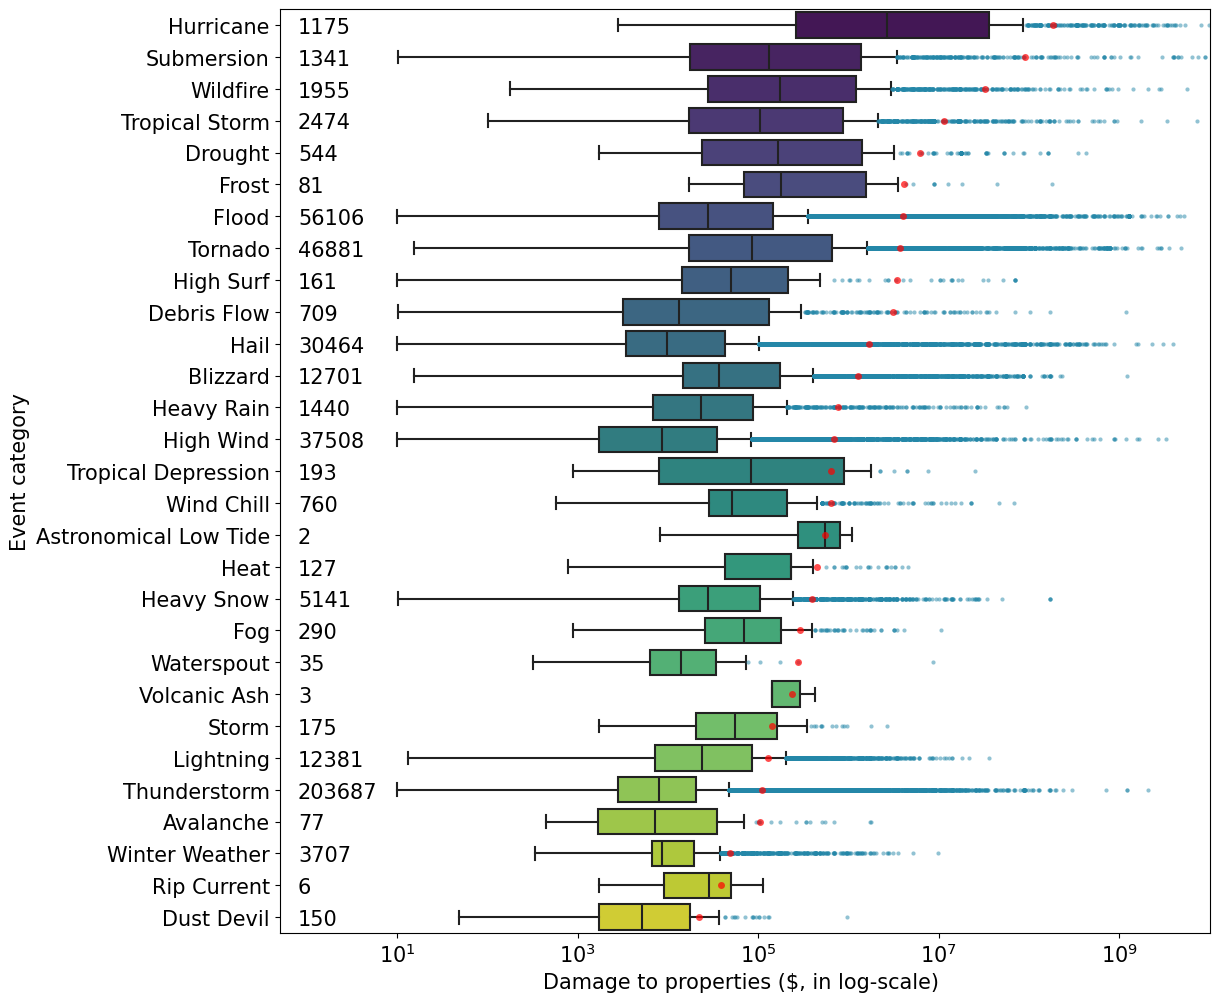

In [21]:
plt.figure(figsize=(12,12))



palette = sns.color_palette("crest_r", 30)

cmap = clr.LinearSegmentedColormap.from_list('custom blue', ["#D8F5DB", '#08316D'], N=256) #9FCAE1

sub_data = storm_data[['EVENT_CAT', "DISCOUNT_DAMAGE_PROPERTY"]].loc[storm_data["DISCOUNT_DAMAGE_PROPERTY"] != 0]

sort_index = storm_data.loc[(storm_data["DISCOUNT_DAMAGE_PROPERTY"] != 0)].groupby(["EVENT_CAT"])["DISCOUNT_DAMAGE_PROPERTY"].mean()
sort_index = dict(sorted(sort_index.items(), key=lambda item: item[1], reverse = True))
sort_index = [str(x) for x in list(sort_index.keys())]

def sorter(col, reorder = sort_index):
    mapper = {name: order for order, name in enumerate(reorder)}
    return col.map(mapper)


ax = sns.boxplot(x = 'DISCOUNT_DAMAGE_PROPERTY', y = 'EVENT_CAT', orient = "h",
                data = sub_data.sort_values(by = ["EVENT_CAT"], key = sorter),
                showfliers = True, 
                flierprops = dict(marker='o', markerfacecolor='#2487a8', markersize=3,
                markeredgecolor='none', alpha = 0.5),
                showmeans = True,
                meanprops = dict(marker='o', markerfacecolor='red', markersize=5,
                markeredgecolor='none', alpha = 0.7),
                palette = "viridis")


nobs = sub_data["EVENT_CAT"].value_counts()
nobs = dict(sorted(nobs.items(), key=lambda item: sort_index.index(item[0])))
nobs = [str(x) for x in list(nobs.values())]
pos = range(len(nobs))

for tick, label in zip(pos, ax.get_yticklabels()):
    ax.text(0.8, tick+0.25, nobs[tick], fontdict = {"size":15})

ax.yaxis.set_tick_params(labelsize = 15)
ax.xaxis.set_tick_params(labelsize = 15)

plt.xscale('log')
plt.xlim((0.5, 1e10))
plt.ylabel("Event category", fontdict = {"size":15})
plt.xlabel("Damage to properties ($, in log-scale) ", fontdict = {"size":15})
plt.savefig(r"C:\Users\Utilisateur\OneDrive - Imperial College London\Documents\Master thesis\Non-stationary hazard modelling project\Dissertation - Report\Figures\PDF\damages_by_cat.pdf", format='pdf', bbox_inches = "tight")
plt.show();

### Cost per type of event (crops)

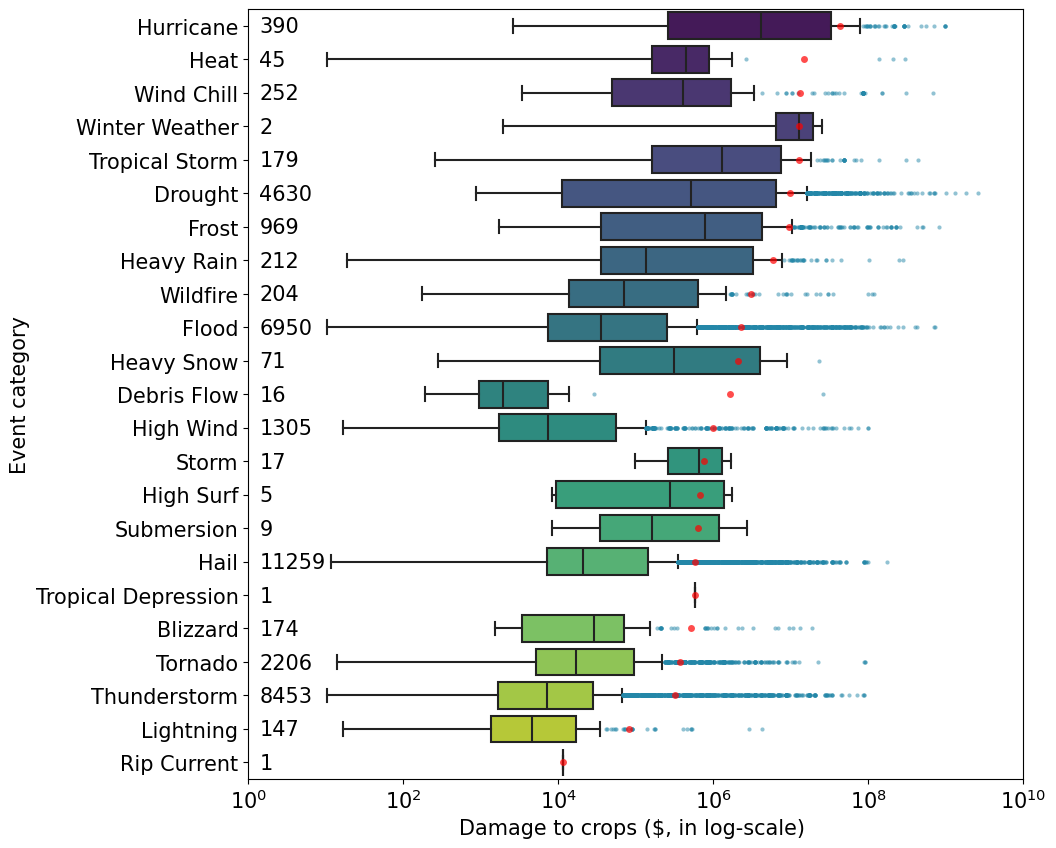

In [22]:
plt.figure(figsize=(10,10))

sub_data = storm_data[['EVENT_CAT', "DISCOUNT_DAMAGE_CROPS"]].loc[(storm_data["DISCOUNT_DAMAGE_CROPS"] != 0)]

sort_index = storm_data.loc[(storm_data["DISCOUNT_DAMAGE_CROPS"] != 0)].groupby(["EVENT_CAT"])["DISCOUNT_DAMAGE_CROPS"].mean()
sort_index = dict(sorted(sort_index.items(), key=lambda item: item[1], reverse = True))
sort_index = [str(x) for x in list(sort_index.keys())]

def sorter(col, reorder = sort_index):
    mapper = {name: order for order, name in enumerate(reorder)}
    return col.map(mapper)


ax = sns.boxplot(x = 'DISCOUNT_DAMAGE_CROPS', y = 'EVENT_CAT', orient = "h",
             data = sub_data.sort_values(by = ["EVENT_CAT"], key = sorter),
               showfliers = True, flierprops = dict(marker='o', markerfacecolor='#2487a8', markersize=3,
                  markeredgecolor='none', alpha = 0.5),
                  showmeans = True,
                  meanprops = dict(marker='o', markerfacecolor='red', markersize=5,
                  markeredgecolor='none', alpha = 0.7),
                  palette = "viridis")




nobs = sub_data["EVENT_CAT"].value_counts()
nobs = dict(sorted(nobs.items(), key=lambda item: sort_index.index(item[0])))
nobs = [str(x) for x in list(nobs.values())]
pos = range(len(nobs))

for tick, label in zip(pos, ax.get_yticklabels()):
    ax.text(1.4, tick+0.2, nobs[tick], fontdict = {"size":15})


ax.yaxis.set_tick_params(labelsize = 15)
ax.xaxis.set_tick_params(labelsize = 15)

plt.ylabel("Event category", fontdict = {"size":15})
plt.xlabel("Damage to crops ($, in log-scale) ", fontdict = {"size":15})
plt.xscale('log')
plt.xlim((1, 1e10))
plt.savefig(r"C:\Users\Utilisateur\OneDrive - Imperial College London\Documents\Master thesis\Non-stationary hazard modelling project\Dissertation - Report\Figures\PDF\damages_by_cat_crops.pdf", format='pdf', bbox_inches = "tight")
plt.show();

### Geographical data

In [23]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import mapclassify as mc

from shapely.geometry import Point

In [24]:
# Localisation of the events

begin_points = storm_data.apply(
    lambda srs: Point(float(srs['long']), float(srs['lat'])),
    axis='columns'
)

0                       POINT (-99.2 35.145)
1                       POINT (-98.6 31.815)
2          POINT (-75.58500000000001 40.615)
3                        POINT (-76.75 40.6)
4                       POINT (-79.68 41.63)
                         ...                
1891634             POINT (-103.708 41.8506)
1891635            POINT (-95.0096 29.38055)
1891636             POINT (-95.20045 30.597)
1891637            POINT (-94.8944 29.84925)
1891638                          POINT EMPTY
Length: 1891639, dtype: object

In [25]:
# Aumenting the dataset with the location of the events

storm_data_geocoded = gpd.GeoDataFrame(storm_data[['EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME','BEGIN_DATE_TIME','CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY','BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
       'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE',
       'INFLATION_INDEX', 'EVENT_CAT', 'DISCOUNT_DAMAGE_PROPERTY',
       'DISCOUNT_DAMAGE_CROPS', "lat", "long"]], geometry=begin_points)
# storm_data_geocoded = storm_data_geocoded.loc[(storm_data_geocoded["BEGIN_LAT"] == storm_data_geocoded["BEGIN_LAT"]) & (storm_data_geocoded["BEGIN_LON"] == storm_data_geocoded["BEGIN_LON"])]

storm_data_geocoded = storm_data_geocoded.loc[(storm_data_geocoded["lat"] == storm_data_geocoded["lat"]) & (storm_data_geocoded["long"] == storm_data_geocoded["long"])]

#### Visualisation of the striking points of the different events

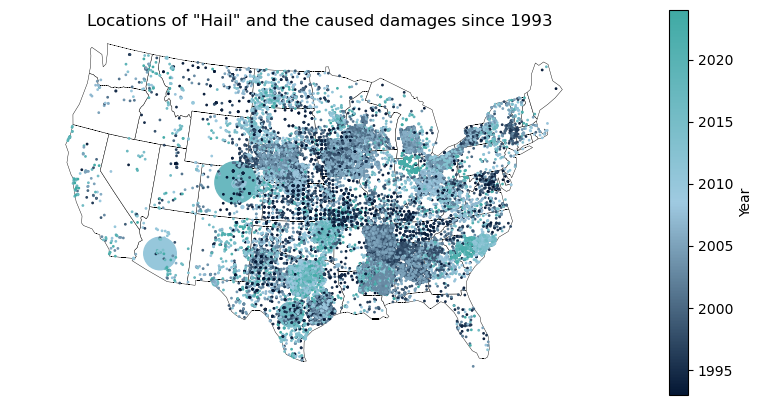

In [27]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

event_cat = "Hail"

cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#041734',"#9FCAE1", '#3FAAA4'], N=256) #9FCAE1

ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea(), linewidth = 0.3, facecolor='white', edgecolor ="k", figsize = (10,10))

gplt.pointplot(storm_data_geocoded.loc[(storm_data_geocoded["EVENT_CAT"] == event_cat) & (storm_data_geocoded["DISCOUNT_DAMAGE_PROPERTY"] != 0)],
                ax=ax,
                extent=contiguous_usa.total_bounds,
                projection=gcrs.AlbersEqualArea(),
                hue = "YEAR", scale = "DISCOUNT_DAMAGE_PROPERTY", legend = True, legend_var = "hue",
                legend_kwargs={"shrink": 0.5, "label": "Year"},
                limits = (1, 30), 
                cmap = cmap)


plt.title(f'Locations of "{event_cat}" and the caused damages since {storm_data_geocoded.loc[(storm_data_geocoded["EVENT_CAT"] == event_cat) & (storm_data_geocoded["DISCOUNT_DAMAGE_PROPERTY"] != 0)]["YEAR"].unique().min()}');
# Colorscaling acording to the year and size according to the extent of the damages


## Selection of the peril and visualisation of their space-time localisation

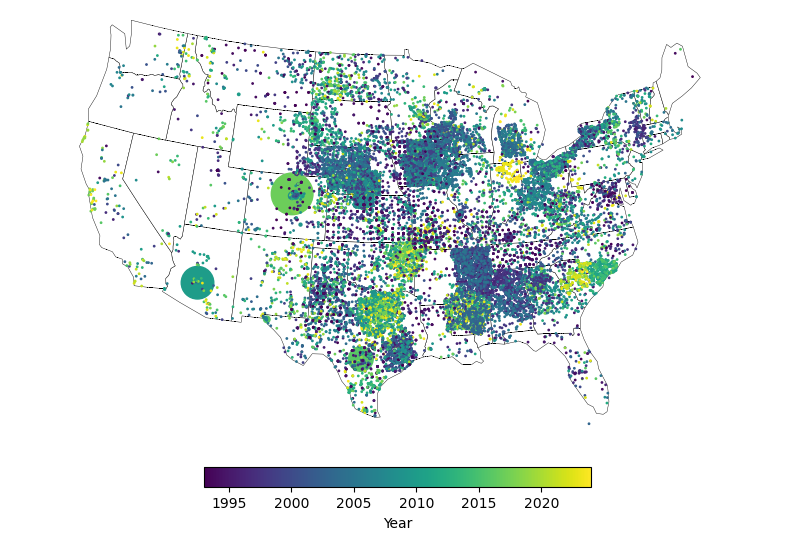

In [31]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)


cmap = clr.LinearSegmentedColormap.from_list('custom', ['#0014fb', '#fb0000'], N=256) #9FCAE1

event_cat = "Hail"

sub_data = storm_data_geocoded.loc[((storm_data_geocoded["EVENT_CAT"] == event_cat)) & 
                                    (storm_data_geocoded["DISCOUNT_DAMAGE_PROPERTY"] != 0)]

ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea(), linewidth = 0.3, facecolor='white', edgecolor ="k", figsize = (10,10))

gplt.pointplot(sub_data,
                ax=ax,
                extent=contiguous_usa.total_bounds,
                projection=gcrs.AlbersEqualArea(),
                hue = "YEAR", scale = "DISCOUNT_DAMAGE_PROPERTY", legend = True, legend_var = "hue",
                legend_kwargs={"shrink": 0.5, "label": "Year", "orientation":"horizontal", "pad":0.05},
                limits = (1, 30), 
                cmap = "viridis")
# plt.savefig(r"C:\Users\Utilisateur\OneDrive - Imperial College London\Documents\Master thesis\Non-stationary hazard modelling project\Dissertation - Report\Figures\PDF\striking_points_hail.pdf", format='pdf', bbox_inches = "tight")

plt.title(f'Locations of "{event_cat}" and the caused damages since {sub_data["YEAR"].unique().min()}');


## USA mesh

In [3]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

In [19]:
usa_polygon = contiguous_usa.geometry[0]
min_x, min_y, max_x, max_y = usa_polygon.bounds

# Define grid spacing
spacing = .5 # degree spacing for grid points

# Generate grid of points within the bounding box
x_coords = np.arange(np.floor(min_x), np.ceil(max_x), spacing)
y_coords = np.arange(np.floor(min_y), np.ceil(max_y), spacing)

grid_points = []
for x in x_coords:
    for y in y_coords:
        point = Point(x, y)
        if usa_polygon.contains(point):
            grid_points.append((point.x, point.y))

# Create a DataFrame from grid points
grid_df = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in grid_points])

c:\Users\Utilisateur\anaconda3\Lib\site-packages\geopandas\geoseries.py:648: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = getattr(super(), mtd)(*args, **kwargs)


In [34]:
from shapely import Polygon, MultiPolygon

def extract_points(geometry):
    if isinstance(geometry, Polygon):
        return list(geometry.exterior.coords)
    elif isinstance(geometry, MultiPolygon):
        points = []
        for polygon in geometry.geoms:
            points.extend(list(polygon.exterior.coords[:-1]))
        return points
    else:
        return []
    
all_points = []

for geometry in contiguous_usa.geometry:
    points = extract_points(geometry)
    all_points.extend(points)
unique_points = list(set(all_points))


longitude = [point[0] for point in all_points]
latitude = [point[1] for point in all_points]

boundaries_mesh = pd.DataFrame({"long": longitude, "lat": latitude})

In [126]:
boundaries_mesh.to_csv("../Data/US_map/boundaries_US_mesh.csv")

## USA regions mapping

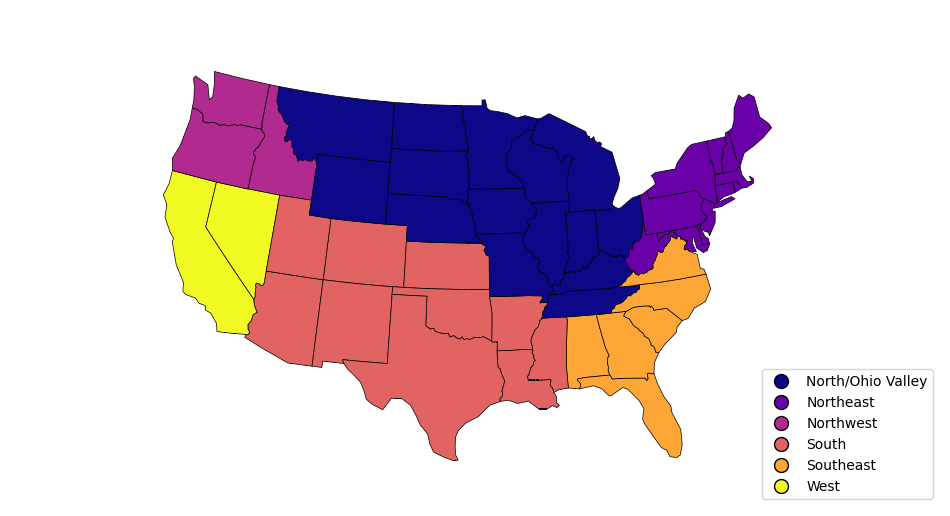

In [32]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path).rename(columns = {"state":"State"})
states_mapping = pd.read_csv("../Data/mapping_tables/US_STATE.csv")

states_mapping["New_reg"] = np.where((states_mapping["Clim_Region"] == "South") | (states_mapping["Clim_Region"] == "Southwest"), "South", states_mapping["Clim_Region"])
states_mapping["New_reg"] = np.where((states_mapping["Clim_Region"] == "Northern Rockies and Plains") | (states_mapping["Clim_Region"] == "Upper Midwest") | (states_mapping["Clim_Region"] == "Ohio Valley"), "North/Ohio Valley", states_mapping["New_reg"])

contiguous_usa = contiguous_usa.join(states_mapping[["State", "Region", "Clim_Region", "New_reg"]].set_index("State"), on  = "State")

gplt.choropleth(
    contiguous_usa, hue='New_reg', projection=gcrs.AlbersEqualArea(),
    cmap='plasma', legend=True, edgecolor = "black", linewidth = 0.5,
    figsize = (12,12), legend_kwargs={'loc': 'lower right'}
)

plt.savefig(r"C:\Users\Utilisateur\OneDrive - Imperial College London\Documents\Master thesis\Non-stationary hazard modelling project\Dissertation - Report\Figures\PDF\Climate_map_US_adapted.pdf", format='pdf', bbox_inches = "tight")

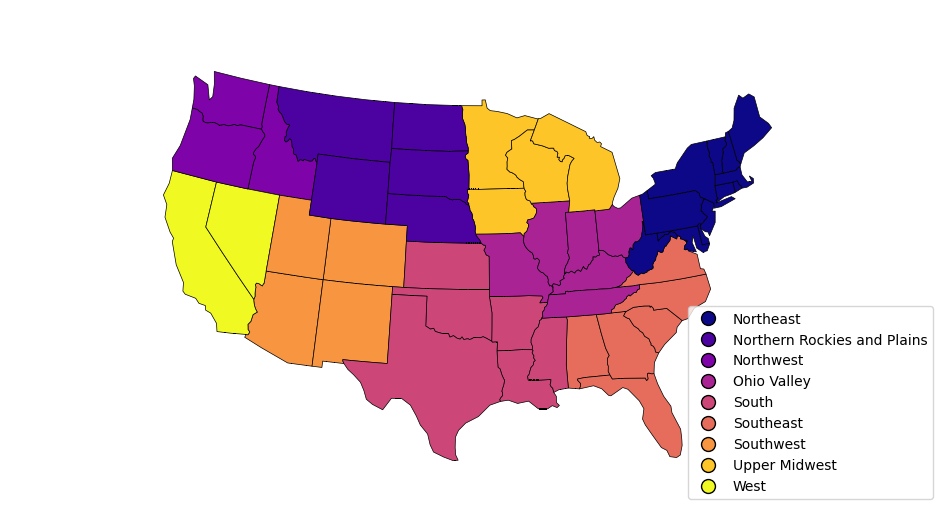

In [33]:
gplt.choropleth(
    contiguous_usa, hue='Clim_Region', projection=gcrs.AlbersEqualArea(),
    cmap='plasma', legend=True, edgecolor = "black", linewidth = 0.5,
    figsize = (12,12),legend_kwargs={'loc': 'lower right'}
)

plt.savefig(r"C:\Users\Utilisateur\OneDrive - Imperial College London\Documents\Master thesis\Non-stationary hazard modelling project\Dissertation - Report\Figures\PDF\Climate_map_US.pdf", format='pdf', bbox_inches = "tight")

In [159]:
states_mapping.to_csv("../Data/mapping_tables/US_STATE.csv")